# Tarea - examen 2

#### René Nicolás **Quijada Romero**, 2023.

En este notebook resolveremos los ejercicios de la segunda tarea examen correspondiente al tema de soluciones de ecuaciones diferenciales ordinarias.


---

In [12]:
from pylab import *

## Ejercicio 1

Generalidades del ejercicio 1:

asdasdasd

### a) Ecuaciones de movimiento en coordenadas cartesianas.

A continuación encontraremos las ecuaciones de movimiento del sistema en coordenadas cartesianas. Para ello utilizaremos la segunda ley de newton en su forma

$$
\frac{d^{2}\vec{r}}{dt^{2}} = \frac{\vec{F_{tot}}}{m}
$$

Para plantearlas, dividiremos la ecuación en dos casos, tal como especifica el problema, daremos el sistema y en la definición de la función dividiremos por la masa.

#### Caso 1: $||\vec{v}|| \leq 1$

Tenemos que

$$
\frac{d² \vec{r}}{dt²} = -k\vec{r} - \gamma \vec{v}
$$

Recordemos que $\vec{r} = (x,y)$ y que $\vec{v} = (\dot{x}, \dot{y})$, entonces la ecuación puede ser reescrita de manera equivalente como:

$$
\frac{d^{2} (x,y)}{dt^{2}} = (-kx-\gamma\dot{x}, -ky-\gamma\dot{y}) = \vec{g}_{1}(\vec{r})
$$

$$
\begin{pmatrix} \ddot{x}  \\ \ddot{y} \end{pmatrix} = \begin{pmatrix} -kx - \gamma \dot{x} \\ -k y - \gamma \dot{y} \end{pmatrix} \;
$$

Dada esta ecuación hacemos un cambio de variable para poder solucionar el sistema:

$$
v_{x} = \dot{x} \\
v_{y} = \dot{y}
$$

Entonces nuestro sistema se convierte en el siguiente:

$$
\begin{pmatrix} \dot{x} \\ \dot{y} \\ \dot{v_{x}}  \\ \dot{v_{y}} \end{pmatrix} = 
\begin{pmatrix} v_{x} \\ v_{y} \\ -kx - \gamma v_{x} \\ -k y - \gamma v_{y} \end{pmatrix} \;
$$

#### Caso 2: $||\vec{v}|| > 1$

Tenemos pues que:

$$
\frac{d^{2}(x,y)}{dt^{2}} = -k\vec{r} -\mu (\dot{x}^{2} + \dot{y}^{2})^{\frac{3}{2}} \frac{(\dot{x}, \dot{y})}{\sqrt{\dot{x}^{2} + \dot{y}^{2} }}
$$

Simplificando la expresión nos queda que:

$$
\frac{d^{2}(x,y)}{dt^{2}} = -k\vec{r} -\mu (\dot{x}^{2} + \dot{y}^{2}) (\dot{x}, \dot{y})
$$

Simplificando de nuevo obtenemos:

$$
\frac{d^{2}(x,y)}{dt^{2}} = (-kx -\mu(\dot{x}^{2} + \dot{y}^{2})\dot{x}, -ky -\mu(\dot{x}^{2} + \dot{y}^{2})\dot{y}) = \vec{g}_{2}(\vec{r})
$$

$$
\begin{pmatrix} \ddot{x}  \\ \ddot{y} \end{pmatrix} = \begin{pmatrix} -kx - \mu (\dot{x}^{2} + \dot{y}^{2}) \dot{x} \\ -k y - \mu(\dot{x}^{2} + \dot{y}^{2})\dot{y} \end{pmatrix} \;
$$

De nuevo hacemos el cambio de variable

$$
v_{x} = \dot{x} \\
v_{y} = \dot{y}
$$

Y así nuestro sistema queda:

$$
\begin{pmatrix} \dot{x} \\ \dot{y} \\ \dot{v_{x}}  \\ \dot{v_{y}} \end{pmatrix} = 
\begin{pmatrix} v_{x} \\ v_{y} \\ -kx - \mu (\dot{x}^{2} + \dot{y}^{2}) \dot{x} \\ -k y - \mu(\dot{x}^{2} + \dot{y}^{2})\dot{y} \end{pmatrix} \;
$$

Ahora procedemos a programar la función que nos define a nuestro sistema de ecuaciones. Primero definimos los dos casos posibles separadamente y no nos olvidamos de dividir por $m$:

In [46]:
def OSAR_1(t, b, k = 1, g = 1):
    x, y, vx, vy = b[0], b[1], b[2], b[3] #Definimos los nuevos nombres para evitar confusiones
    
    #Definición de la función
    dx = vx
    dy = vy
    dvx = -k*x - g*vx
    dvy = -k*y - g*vy
    
    return array([dx, dy, dvx, dvy]) #Regresa un arreglo con la función evaluada

In [47]:
def OSAR_2(t, b, k = 1, m = 1): #Recibe un tiempo t, el vector b = (x,y,vx,vy) del sistema de ecuaciones y argumentos opcionales
    x, y, vx, vy = b[0], b[1], b[2], b[3] #Definimos los nuevos nombres para evitar confusiones
    
    #Definición de la función
    dx = vx
    dy = vy
    dvx = -k*x - m*((vx)**2+(vy)**2)*vx
    dvy = -k*y - m*((vx)**2+(vy)**2)*vy
    
    return array([dx, dy, dvx, dvy]) #Regresa un arreglo con la función evaluada

Ahora combinamos ambos casos en una función condicional:

In [87]:
def OSAR(t, b):
    v = sqrt(b[2]**2 + b[3]**2) #Encontramos la norma de la velocidad en el punto
    if v <= 1:
        print("uno")
        return OSAR_1(t, b, k =1, g = 1)
    else:
        print("dos")
        return OSAR_2(t, b, k = 1, m = 1)

Ahora daremos el algoritmo de Runge - Kutta 4 para resolver la ecuación.

In [55]:
def RK_4(edo, ci , tmp, d = 0.1):
    t = arange(tmp[0], tmp[1] + d, d) #Malla temporal con el espaciado
    sol = zeros( (len(t) , len(ci)) ) #len(t) filas con len(ci) columnas
    sol[0,:] = ci
    for i in range(0,len(t)-1): #Cuidamos el orden tiempo-vector en la edo
        k1 = edo(t[i],sol[i,:])
        k2 = edo(t[i] + 0.5*d, sol[i,:] + 0.5*d*k1)
        k3 = edo(t[i] + 0.5*d,sol[i,:] + 0.5*d*k2)
        k4 = edo(t[i] + d, sol[i,:] + d*k2)
        sol[i+1,:] = sol[i,:] + (d/6.0)*(k1 + 2.0*k2 + 2.0*k3 + k4)
    return sol, t #Regresa la solución junto con los tiempos asociados

Ahora resolvemos la ecuación diferencial con las siguientes condiciones iniciales:

$$
x_{0} = 0 \\
y_{0} = 1 \\
v_{x_{0}} = 2\cos(\pi) = -2 \\
v_{y_{0}} = 2\sin(\pi) = 0 \\
$$

dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
dos
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno
uno


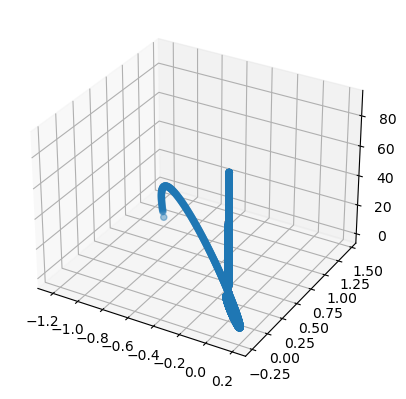

In [89]:
# Condición inicial

B0 = [-1, 1, -6, 10]

solucion = RK_4(OSAR, B0, [0,90], d = 0.01)

tmps = solucion[1]
xs = solucion[0][:,0]
ys = solucion[0][:,1]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xs, ys, tmps)

show()

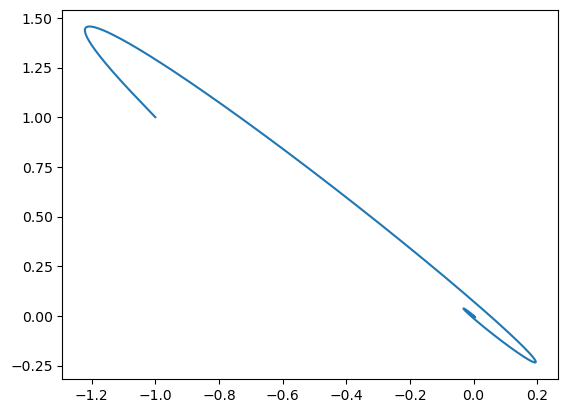

In [90]:
plot(xs,ys)